# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

data = pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Convert the Age column from float64 to object
data['age'] = data['age'].astype(int)

# Check the data types after conversion
print(data.dtypes)

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data Cleaning

In [7]:
# Check for missing values

data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# Delete the "Other" variables in Gender column
remove = ["Other"]
data[~data['gender'].isin(remove)]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


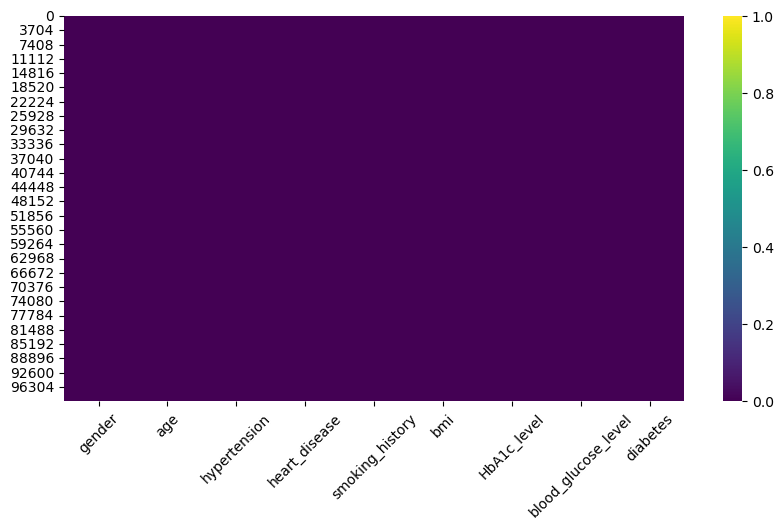

In [9]:
# Visualise for missing values

plt.figure(figsize=(10,5))
sns.heatmap(data = data.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

# Exploratory Data Analysis (EDA)

## Numerical Data

In [10]:
num_data = data.select_dtypes(exclude = "object")
num_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0
2,28,0,0,27.32,5.7,158,0
3,36,0,0,23.45,5.0,155,0
4,76,1,1,20.14,4.8,155,0


In [11]:
num_column = num_data.columns
num_column

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

### Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

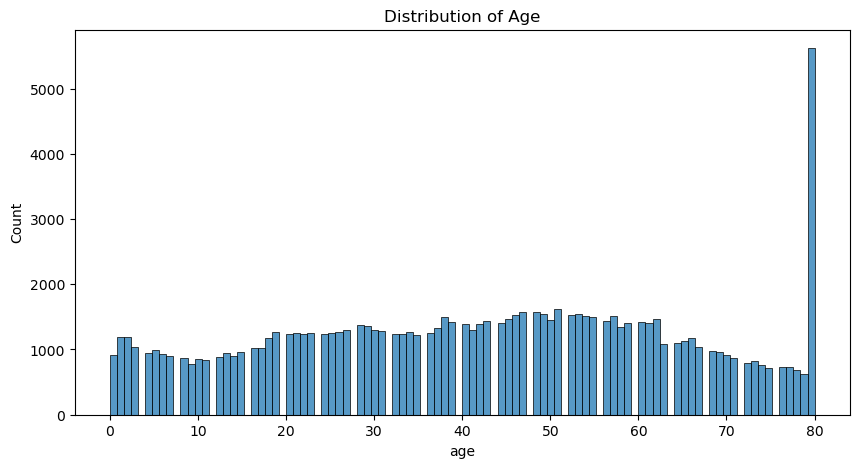

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data = data["age"], bins= 100)
plt.title("Distribution of Age");
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

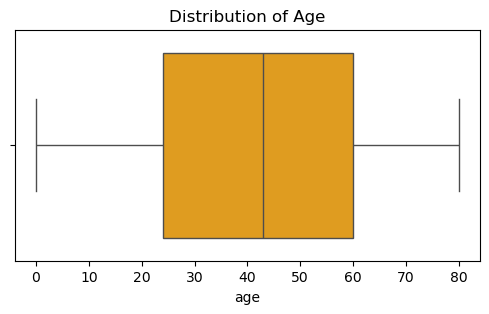

In [13]:
plt.figure(figsize=(6,3))
sns.boxplot(data = data["age"], orient = 'h', color = "orange")
plt.title("Distribution of Age");
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

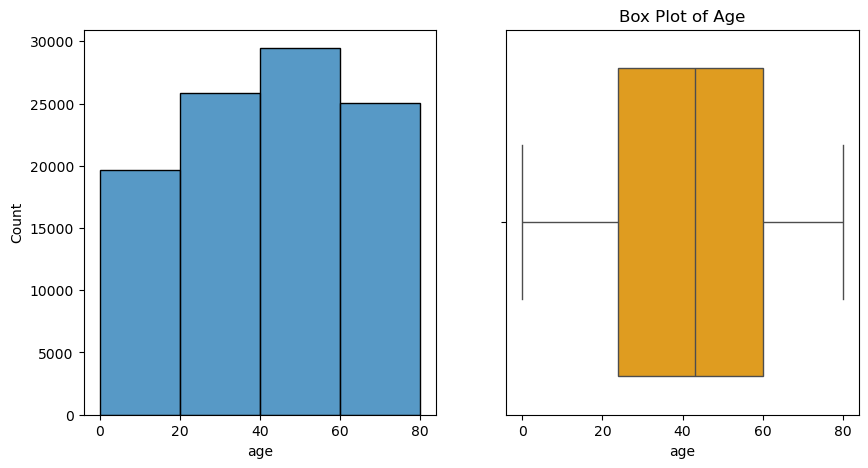

In [14]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(data = data["age"], bins= 4, ax = axis [0])
plt.title("Distribution of Age");

sns.boxplot(data = data["age"], orient = 'h', color = "orange", ax= axis[1])
plt.title("Box Plot of Age");

plt.show

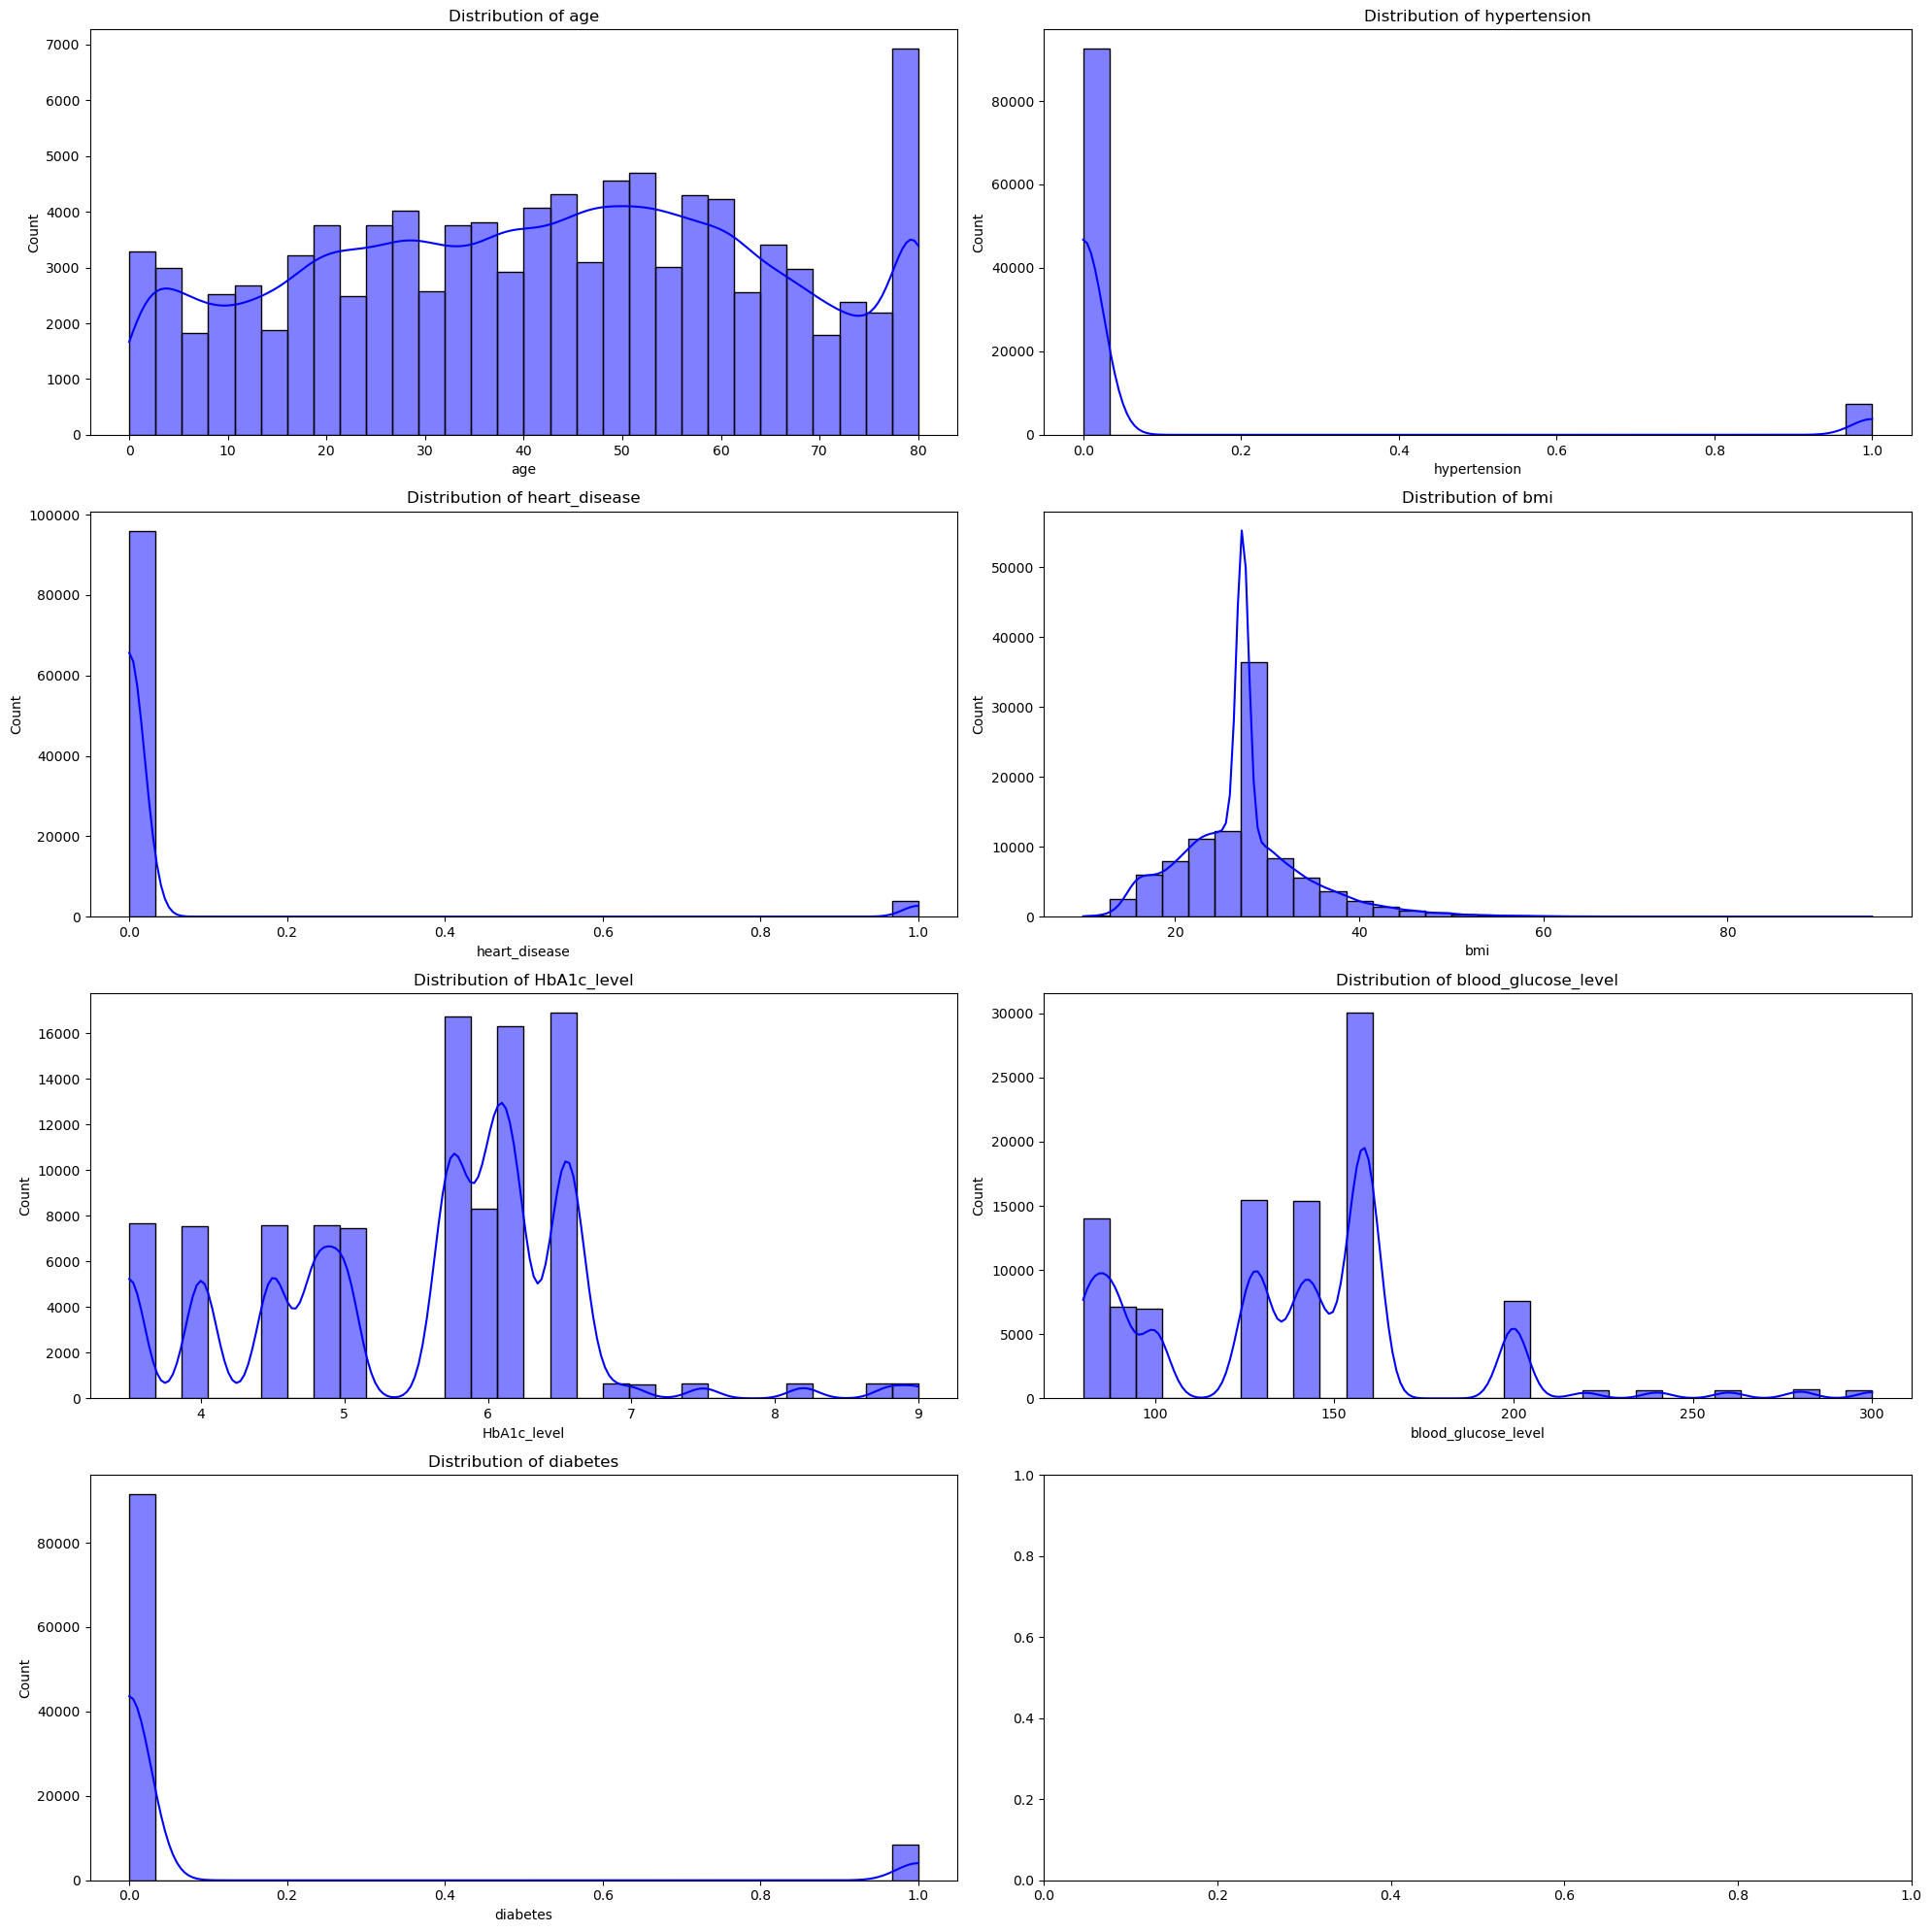

In [15]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
position  = axis.flatten()

for index, name_of_feature in enumerate(num_column):
    sns.histplot(x=data[name_of_feature], bins=30, color="blue", kde=True, ax = position[index])
    position[index].set_title(f"Distribution of {name_of_feature}")
    
plt.tight_layout()

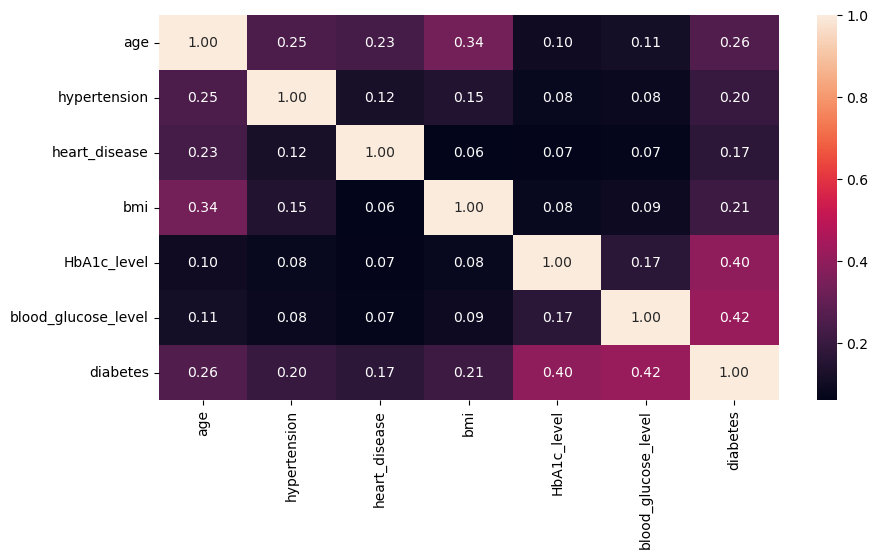

In [16]:
plt.figure(figsize = (10,5))
correlation_map = num_data.corr
sns.heatmap(correlation_map(), annot=True,  fmt = ".2f")
plt.show()

## Categorical Data

In [21]:
cat_data = data.select_dtypes(include = "object")
cat_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [22]:
cat_column = cat_data.columns
cat_column

Index(['gender', 'smoking_history'], dtype='object')

### Univariate Analysis

In [23]:
gender_count = data["gender"].value_counts()
gender_count

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

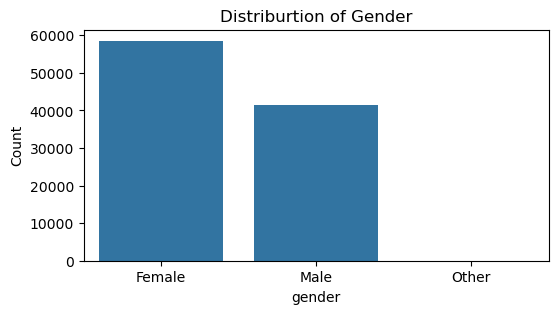

In [24]:
# Visualise the gender distribution
plt.figure(figsize=(6,3))
sns.barplot(x = gender_count.index, y = gender_count.values);

plt.title("Distriburtion of Gender")
plt.ylabel("Count")
plt.show

In [25]:
# Check the smoking history distribution

sh_count = data["smoking_history"].value_counts()
sh_count

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

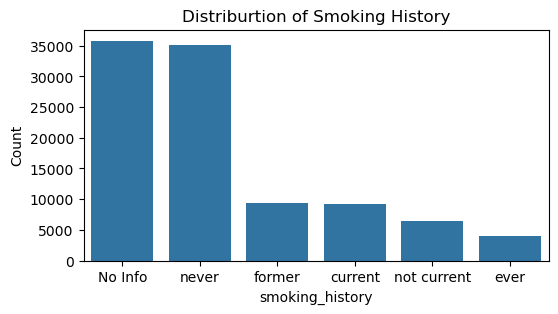

In [26]:
# Visualise the smoking history distribution
plt.figure(figsize=(6,3))
sns.barplot(x = sh_count.index, y = sh_count.values);

plt.title("Distriburtion of Smoking History")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

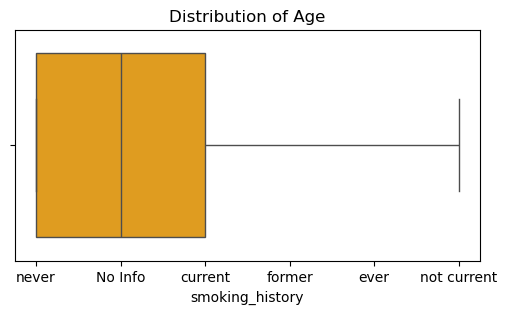

In [61]:
plt.figure(figsize=(6,3))
sns.boxplot(data = data["smoking_history"], orient = 'h', color = "orange")
plt.title("Distribution of Age");
plt.show

## Bivariate Analysis

#### Numerical vs Numerical

In [27]:
num_column

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

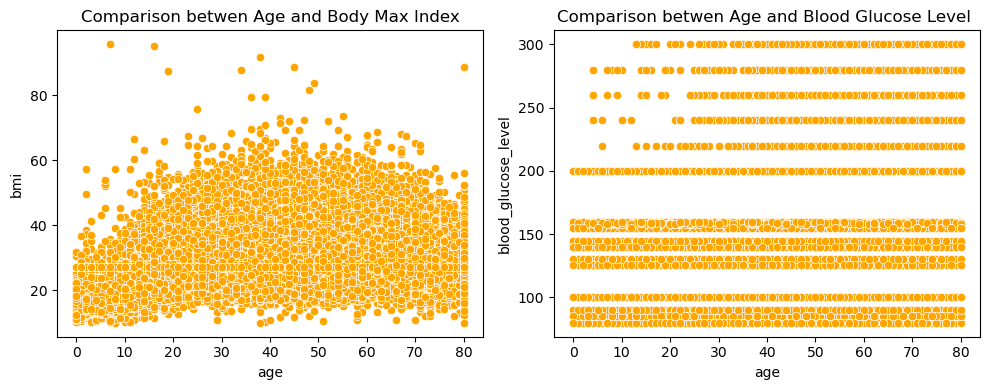

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

position = axes.flatten()

sns.scatterplot(x=data["age"], y=data["bmi"], color="orange", ax=position[0])
position[0].set_title(f"Comparison betwen Age and Body Max Index")
sns.scatterplot(x=data["age"], y=data["blood_glucose_level"], color="orange", ax=position[1])
position[1].set_title(f"Comparison betwen Age and Blood Glucose Level ")

plt.tight_layout()
plt.show()

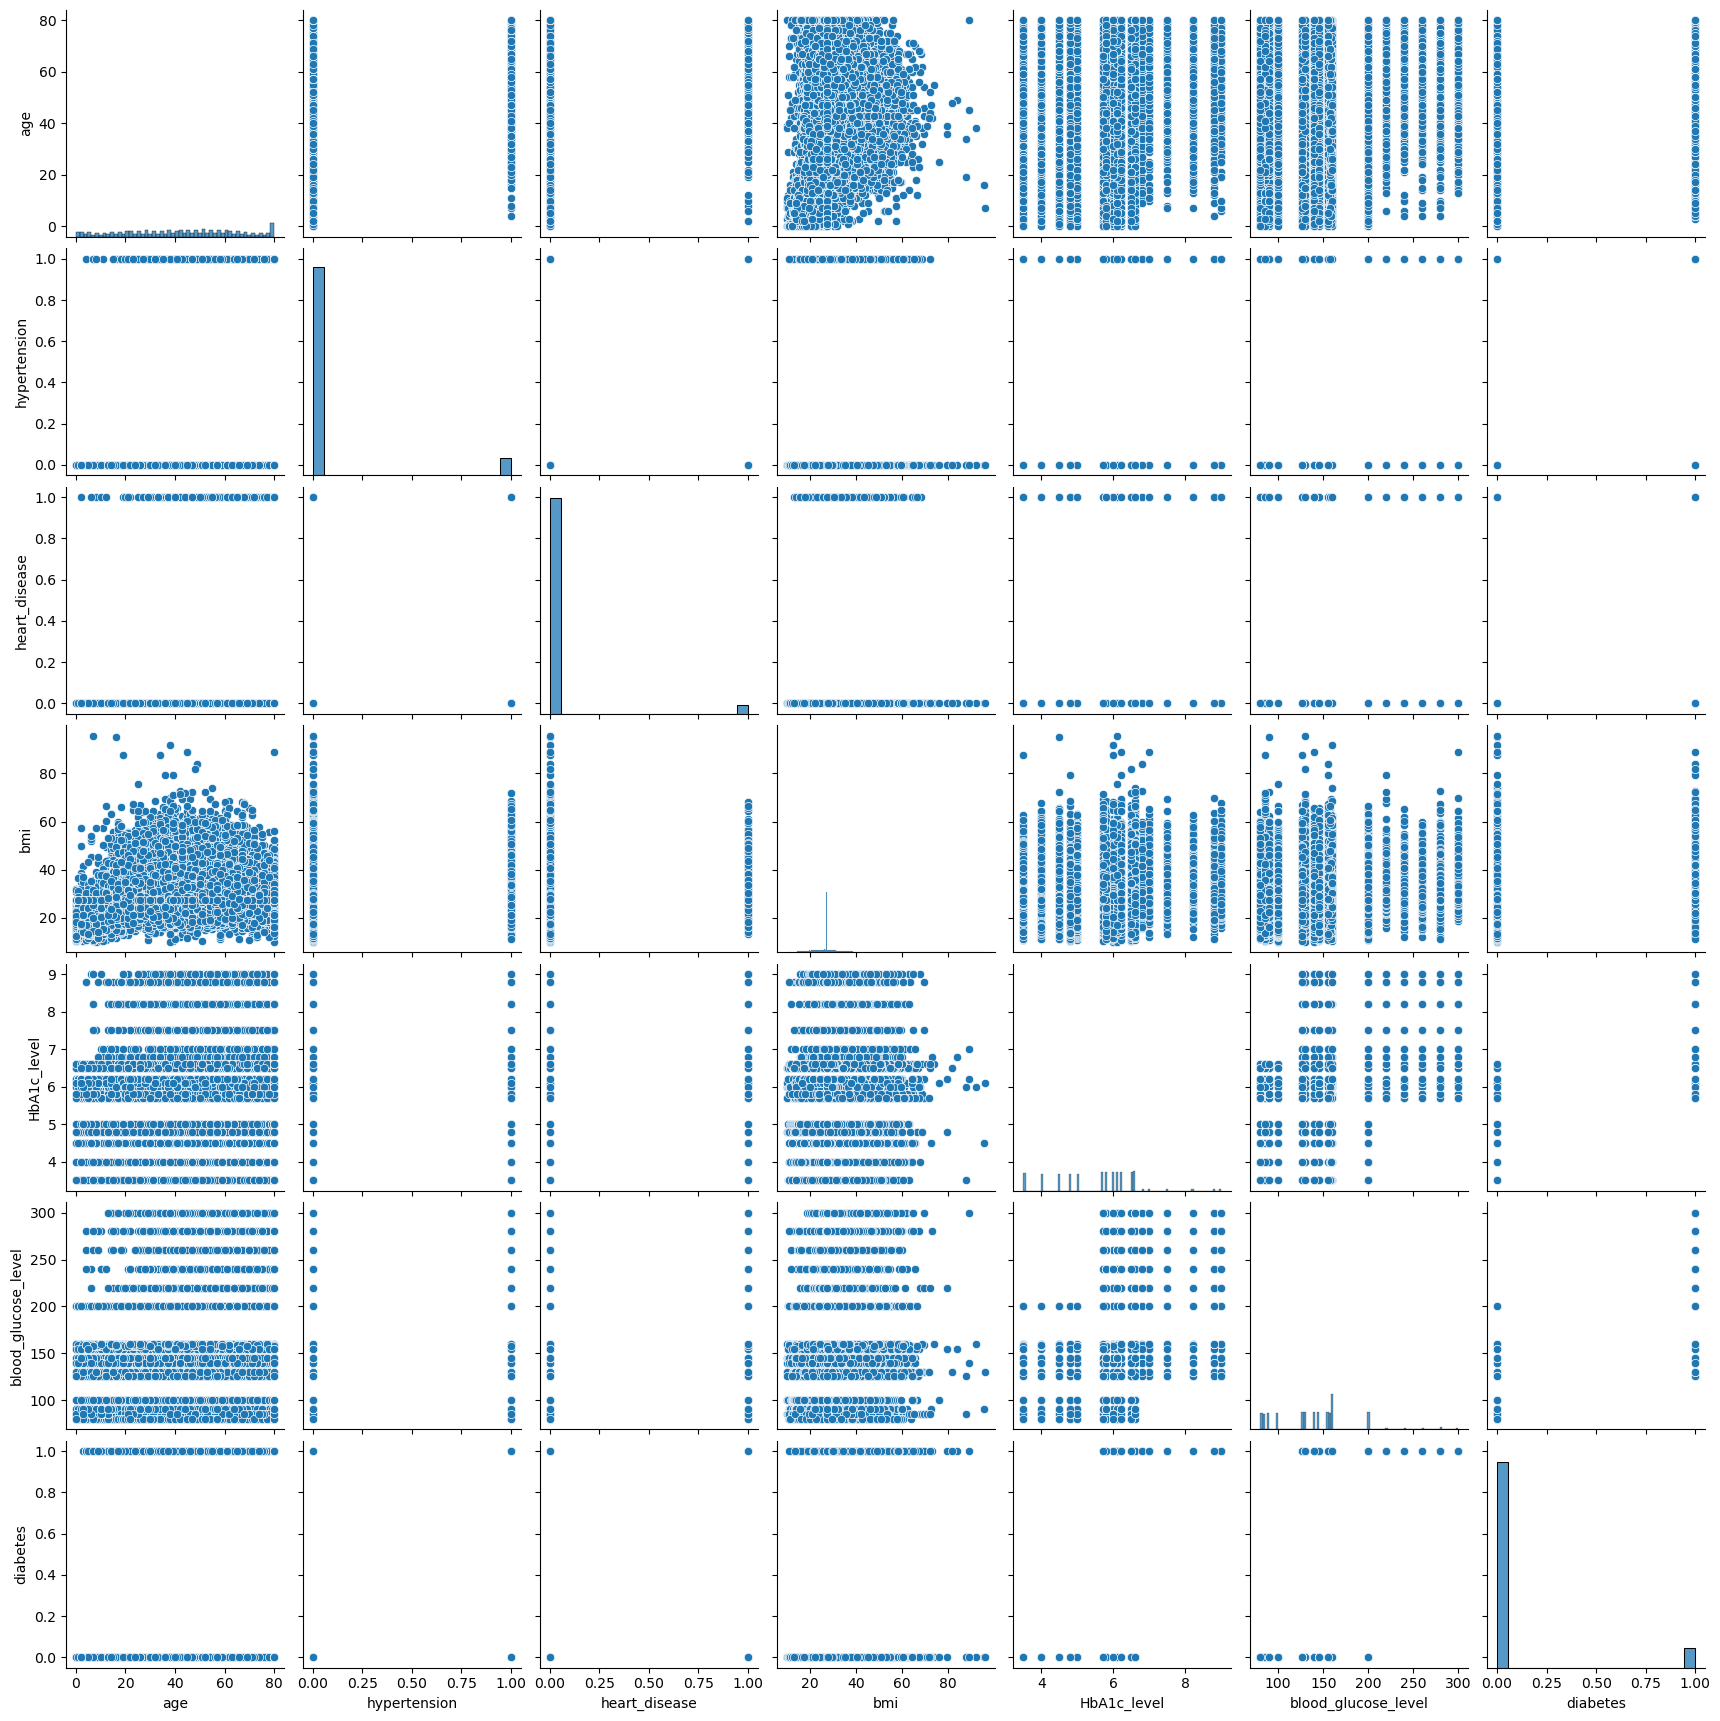

In [29]:
sns.pairplot(data[num_column])

#### Categorical vs Numerical

In [30]:
cat_column

Index(['gender', 'smoking_history'], dtype='object')

In [31]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0


In [32]:
data["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

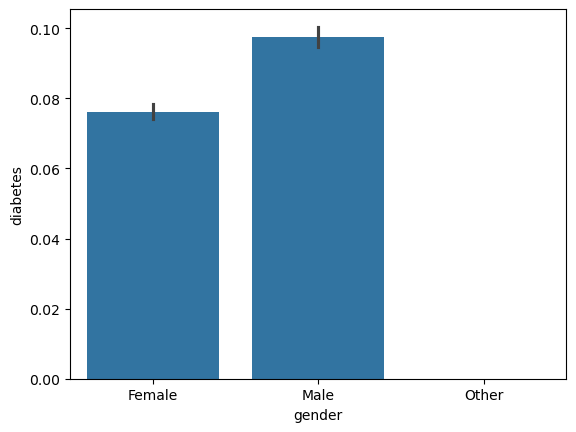

In [33]:
# Check the comparism of gender and diabetes

sns.barplot(x="gender", y="diabetes", data=data);

In [34]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

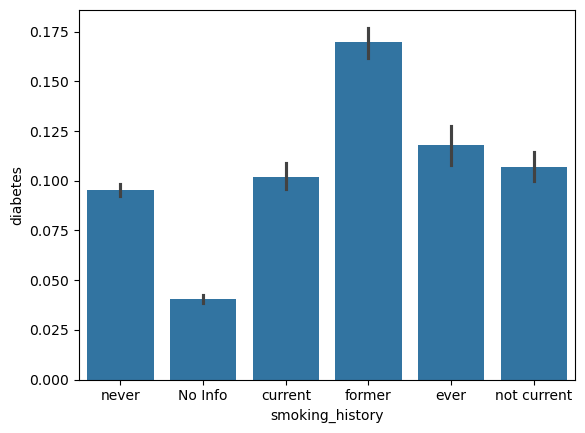

In [35]:
# Check the comparism of Smoking History and diabetes

sns.barplot(x="smoking_history", y="diabetes", data=data);

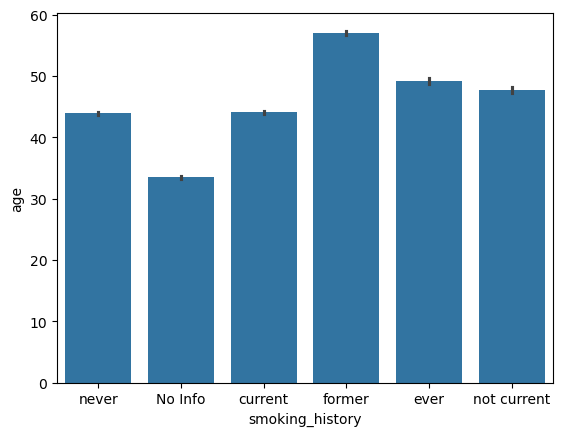

In [36]:
# Check the comparism of smoking history and age

sns.barplot(x="smoking_history", y="age", data=data);

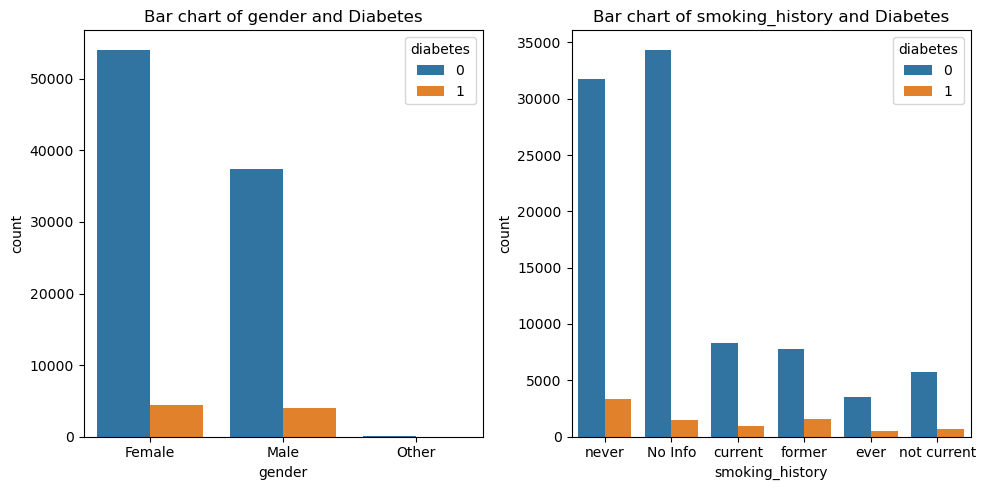

In [62]:
# Check the distribution of the categorical data

fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (10,5))

position = axes.flatten()

for index, feature in enumerate(cat_column):
    sns.countplot(data = cat_data, x = feature, hue = data["diabetes"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Diabetes")

plt.tight_layout()

#### Multivariate Analysis

# Data Preprocesing

# Modelling (Diabetes Prediction)

In [38]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0


In [39]:
# Extract the lebel from the features

label = data["diabetes"]
features = data.drop(["diabetes"], axis=1)

In [40]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,never,25.19,6.6,140
1,Female,54,0,0,No Info,27.32,6.6,80
2,Male,28,0,0,never,27.32,5.7,158
3,Female,36,0,0,current,23.45,5.0,155
4,Male,76,1,1,current,20.14,4.8,155


# Encoding categorical variables

In [44]:
# Convert all the categorical variable into numerical variable using Label encoding

cat_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [46]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of the encode
encoder = LabelEncoder()

for column_name in cat_column:
    features[column_name] = encoder.fit_transform(data[column_name])
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,4,25.19,6.6,140
1,0,54,0,0,0,27.32,6.6,80
2,1,28,0,0,4,27.32,5.7,158
3,0,36,0,0,1,23.45,5.0,155
4,1,76,1,1,1,20.14,4.8,155


# Data Spliting and Feature Scaling

In [47]:
print(f"Our data contain {len(features)} records before spliting")

Our data contain 100000 records before spliting


In [48]:
# Split the data into traning and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [49]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73,0,0,3,24.77,3.5,80
48955,1,80,0,0,4,24.60,5.7,145
44966,0,38,0,0,2,24.33,4.0,158
13568,0,26,0,0,5,18.87,5.0,100
92727,0,61,1,0,1,22.11,4.5,85


In [50]:
len(x_train)==len(y_train)

True

# Model training
### Starting with LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialise the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make prediction
predictions = model.predict(x_test)
predictions

C:\Users\vicab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation 

In [52]:
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.84      0.61      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.90      0.80      0.84     20000
weighted avg       0.95      0.96      0.95     20000



Text(0.5, 23.52222222222222, 'Actual Value')

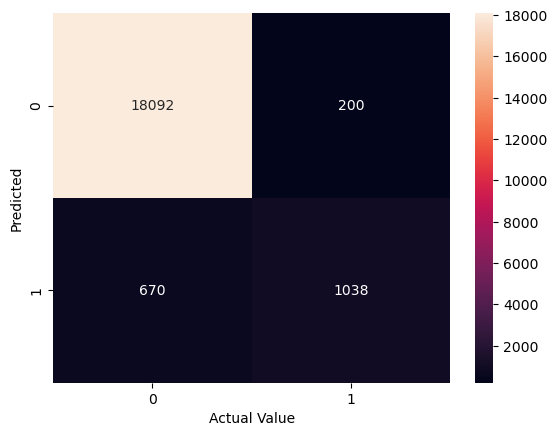

In [53]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Predicted")
plt.xlabel("Actual Value")

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

# Initialise Scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



Text(0.5, 23.52222222222222, 'Actual Value')

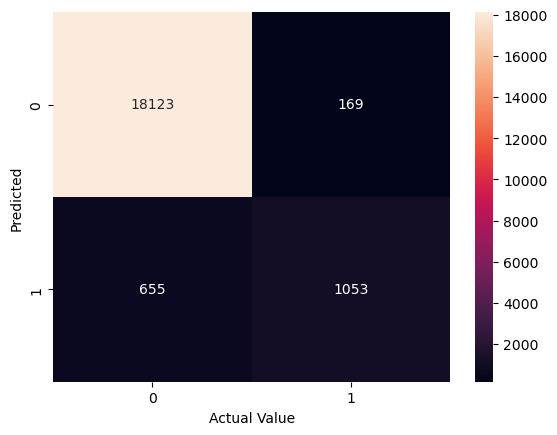

In [58]:
# Initialise the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(x_train_scaled, y_train)

# Make prediction
predictions = model.predict(x_test_scaled)
predictions

#Evaluation
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print(report)

# Plot Evaluation
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Predicted")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



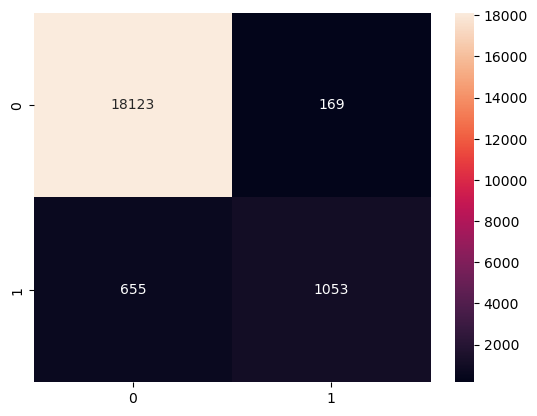

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.88      0.60      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



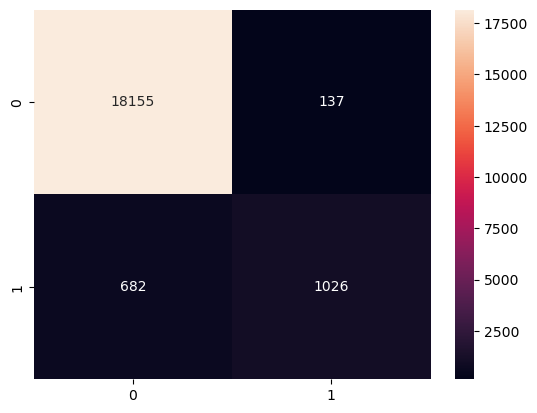

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.70      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



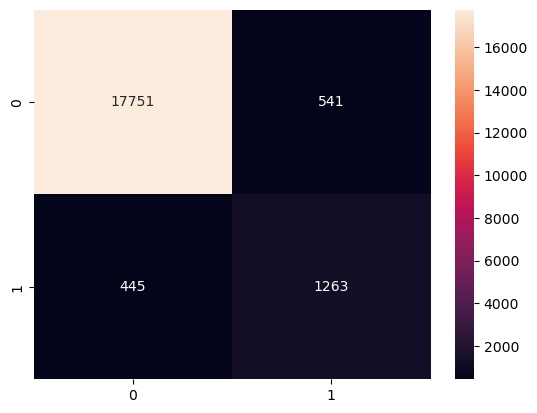

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



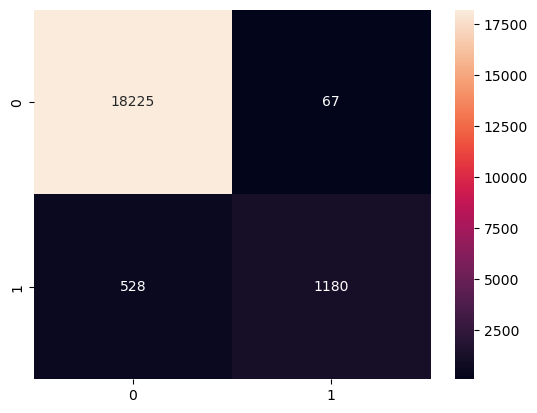

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [SGDClassifier(random_state=42), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [RandomForestClassifier(random_state=42), 'Random Forest'],
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()